In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [3]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

Draw Line Plot

In [4]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['value'], color='tab:red')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig


Draw Bar Plot

In [7]:
def draw_bar_plot():
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month

    # Group data by year and month
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Draw bar plot
    fig = df_bar.plot(kind='bar', figsize=(12, 6), legend=True, xlabel='Years', ylabel='Average Page Views').figure
    plt.legend(title='Months', labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

Draw Box Plot

In [5]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


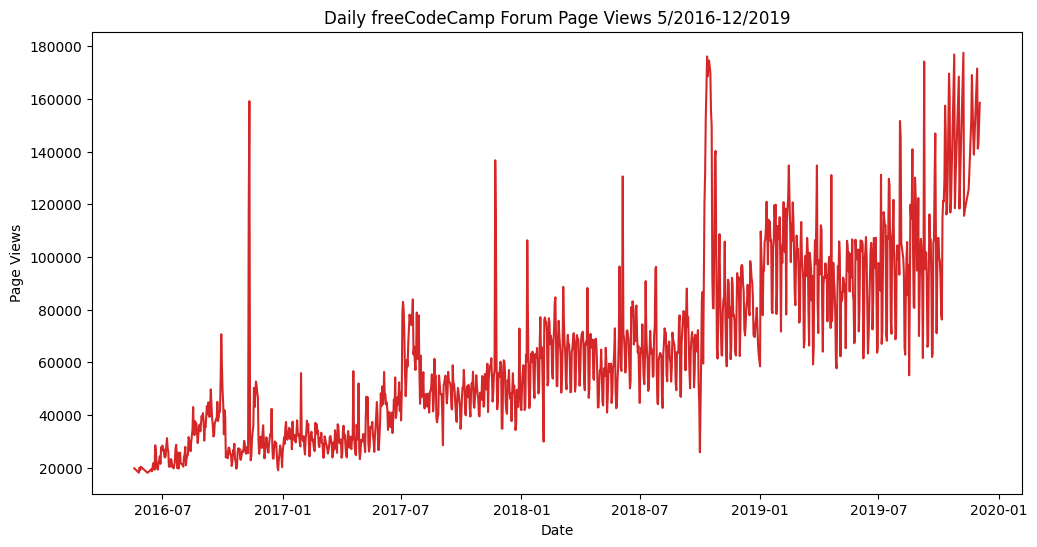

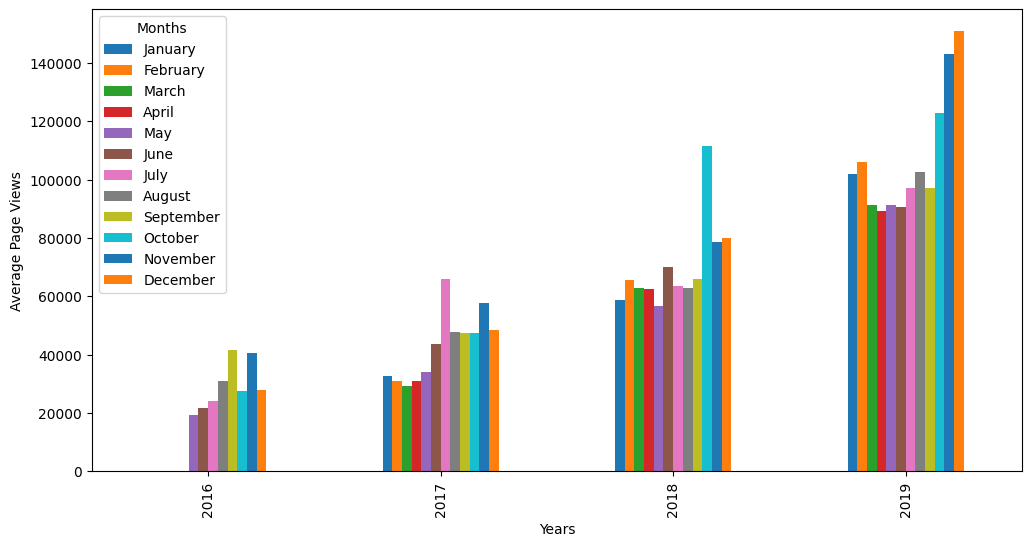

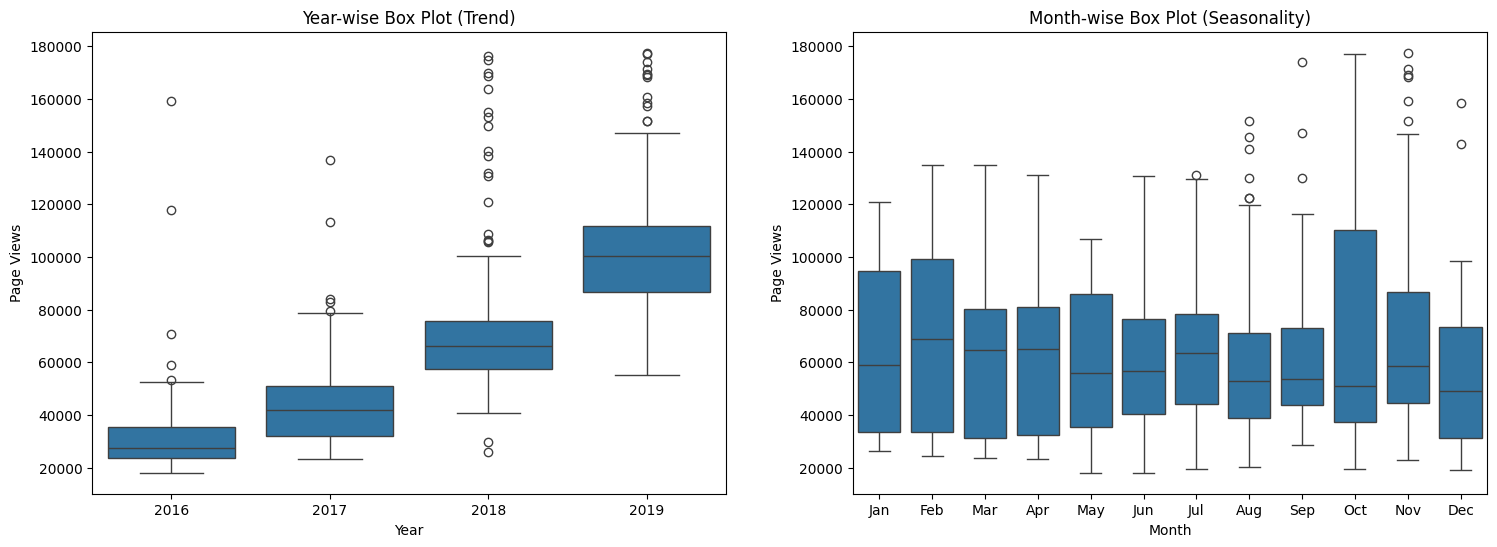

In [8]:
if __name__ == "__main__":
    draw_line_plot()
    draw_bar_plot()
    draw_box_plot()